In [3]:
def write_answer_to_file(answer, filename):
    with open(filename, 'w') as f_out:
        f_out.write(str(round(answer, 3)))

In [7]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy as sc
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline

adver_data = pd.read_csv('advertising.csv')

In [8]:
adver_data.head(n=200)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


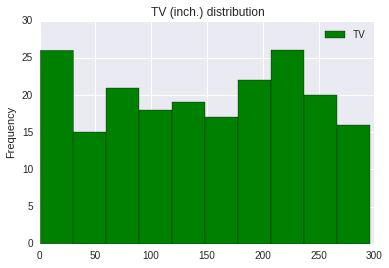

In [9]:
adver_data.plot(y='TV', kind='hist', 
           color='green',  title='TV (inch.) distribution')

In [10]:
X = adver_data[['TV','Radio', 'Newspaper']].values
y = adver_data['Sales'].values

In [11]:
means = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = (X - means)/std

In [12]:
size = np.shape(X)
y = np.ones((size[0], 1))
X = np.hstack((X,y))
print(X)

[[  9.69852266e-01   9.81522472e-01   1.77894547e+00   1.00000000e+00]
 [ -1.19737623e+00   1.08280781e+00   6.69578760e-01   1.00000000e+00]
 [ -1.51615499e+00   1.52846331e+00   1.78354865e+00   1.00000000e+00]
 [  5.20496822e-02   1.21785493e+00   1.28640506e+00   1.00000000e+00]
 [  3.94182198e-01  -8.41613655e-01   1.28180188e+00   1.00000000e+00]
 [ -1.61540845e+00   1.73103399e+00   2.04592999e+00   1.00000000e+00]
 [ -1.04557682e+00   6.43904671e-01  -3.24708413e-01   1.00000000e+00]
 [ -3.13436589e-01  -2.47406325e-01  -8.72486994e-01   1.00000000e+00]
 [ -1.61657614e+00  -1.42906863e+00  -1.36042422e+00   1.00000000e+00]
 [  6.16042873e-01  -1.39530685e+00  -4.30581584e-01   1.00000000e+00]
 [ -9.45155670e-01  -1.17923146e+00  -2.92486143e-01   1.00000000e+00]
 [  7.90028350e-01   4.96973404e-02  -1.22232878e+00   1.00000000e+00]
 [ -1.43908760e+00   7.99208859e-01   1.62704048e+00   1.00000000e+00]
 [ -5.78501712e-01  -1.05768905e+00  -1.07502697e+00   1.00000000e+00]
 [  6.

In [13]:
def mserror(y, y_pred):
    a = (np.sum((y - y_pred)**2))/np.shape(y)[0]
    return(a)

In [14]:
y = adver_data['Sales'].values
a = np.ones(200)
median = np.median(y)
a = a * median
print(a)
answer1 = mserror(y, a)
write_answer_to_file(answer1, '1.txt')

[ 12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9
  12.9  12.9  12.9  12.9  12.9  12.9  12.9  12.9  1

In [15]:
def normal_equation(X, y):
    X_1 = np.linalg.inv(np.dot(X.transpose(),X))
    X_2 = np.dot(X_1, X.transpose())
    X_3 = np.dot(X_2, y)
    return(X_3)

In [16]:
X = adver_data[['TV','Radio', 'Newspaper']].values
y = np.ones((200, 1))
X = np.hstack((X,y))
y = adver_data['Sales'].values
norm_eq_weights = normal_equation(X,y)
print(norm_eq_weights)

[  4.57646455e-02   1.88530017e-01  -1.03749304e-03   2.93888937e+00]


In [17]:
X = adver_data[['TV','Radio', 'Newspaper']].values
y = adver_data['Sales'].values
means = np.mean(X, axis = 0)
print(means)


[ 147.0425   23.264    30.554 ]


In [18]:
a = np.ones((200, 1))
a = a*means[0]
y = np.ones((200, 1))
y = y*means[1]
X = np.hstack((a,y))
y = np.ones((200, 1))
y = y*means[2]
X = np.hstack((X, y))
y = np.ones((200, 1))
X = np.hstack((X,y))
print(X)

[[ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425   23.264    30.554     1.    ]
 [ 147.0425

In [19]:
answer2 = np.dot(X, norm_eq_weights)
answer2 = answer2[0]
print(answer2)
write_answer_to_file(answer2, '2.txt')

14.0225


In [20]:
def linear_prediction(X, w):
    return(np.dot(X, w))
def linear_prediction_new(X, w, k):
    return(np.dot(X[k], w))

In [21]:
X = adver_data[['TV','Radio', 'Newspaper']].values
y = np.ones((200, 1))
X = np.hstack((X,y))
y = adver_data['Sales'].values
w = normal_equation(X, y)
X = adver_data[['TV','Radio', 'Newspaper']].values
y = np.ones((200, 1))
X = np.hstack((X,y))
y = adver_data['Sales'].values
print(w)
print(linear_prediction(X, w))
answer3 = mserror(y, linear_prediction(X, w))
write_answer_to_file(answer3, '3.txt')

[  4.57646455e-02   1.88530017e-01  -1.03749304e-03   2.93888937e+00]
[ 20.52397441  12.33785482  12.30767078  17.59782951  13.18867186
  12.47834763  11.72975995  12.12295317   3.72734086  12.55084872
   7.0322992   17.28512918  10.57712073   8.82630048  18.43436638
  20.81929952  12.82365674  23.22495716   9.95168206  14.16607293
  18.10076728  14.7405382    6.4891503   16.5459329    8.14651887
  15.6100386   14.98951429  17.05167344  19.41053803   9.14402389
  21.6339338   11.3460929    7.63888314  18.86426829   7.57483051
  17.00682618  23.40590052  15.62347779   9.90868103  20.44761039
  16.37766467  17.2959832   21.59580326  13.96385684   8.88787996
  15.16152314   8.87338673  21.7226299   16.26362018   8.1681656
  12.63121132   9.33981296  20.66297563  19.94469957  20.37443008
  21.2926106    8.52771254  12.77458802  21.89805198  18.13348698
   5.74215558  22.89067208  16.78426073  13.21069202  16.97773556
   7.84904532   9.01603163  12.0370073   18.97657924  21.10891244
  17.77

In [22]:
def stochastic_gradient_step(X, y, w, train_ind, eta=0.01):
    k = 2/200
    grad0 = k*(linear_prediction_new(X, w, train_ind) - y[train_ind])
    grad1 = k*X[train_ind][1]*(linear_prediction_new(X, w, train_ind) - y[train_ind])
    grad2 = k*X[train_ind][2]*(linear_prediction_new(X, w, train_ind) - y[train_ind])
    grad3 = k*X[train_ind][3]*(linear_prediction_new(X, w, train_ind) - y[train_ind])
    return  w - eta * np.array([grad0, grad1, grad2, grad3])

In [23]:
def stochastic_gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        w1 = w
        random_ind = np.random.randint(200)
        w = stochastic_gradient_step(X, y, w, random_ind, eta = 0.01)
        iter_num = iter_num + 1
        weight_dist = norm(w1 - w, ord=2)
        errors.append(mserror(y, linear_prediction(X, w)))
    print(iter_num)
    return w, errors

1717
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in square
  
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in subtract
  import sys


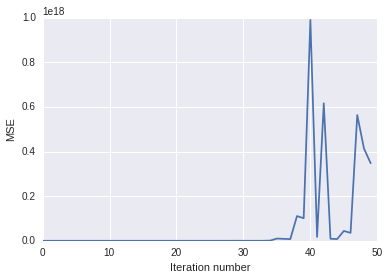

In [26]:
X = adver_data[['TV','Radio', 'Newspaper']].values
means = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
X = (X - means)/std
y = np.ones((200, 1))
X = np.hstack((y,X))
y = adver_data['Sales'].values
w_init = np.array([0,0,0,0])
w_init = w.transpose()
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, w_init, eta=0.01, max_iter = 1e5, min_weight_dist=1e-8, seed=42, verbose=False)
print(stoch_errors_by_iter[9999])
%pylab inline
plot(range(50), stoch_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')

Populating the interactive namespace from numpy and matplotlib


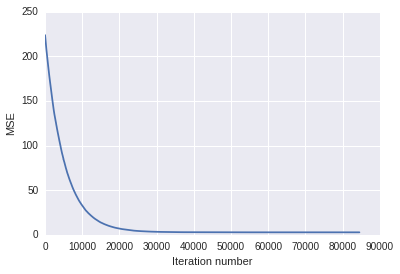

In [355]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')

In [361]:
stoch_grad_desc_weights

array([  1.40190566e+01,   3.91069256e+00,   2.78209808e+00,
        -8.10462217e-03])

In [363]:
answer4 = stoch_errors_by_iter[-1]
print(answer4)
write_answer_to_file(answer4, '4.txt')

2.78441258841
